In [500]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [413]:
Habitable=pd.read_csv('data.csv')
Habitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
3,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,37.426000,0.000700,-0.001000,0.0,0.1630,0.015,-0.015,0.0,1.19,0.11,-0.11,0.0,0.106,0.010,-0.010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032,0.054,-0.023,0.0,0.86,0.19,-0.15,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,M2 V,3480.00,135.00,-135.00,0.0,0.42,0.03,-0.03,0.0,0.42,0.01,-0.01,0.0,-0.070,0.110,-0.110,0.0,[Fe/H],4.81,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.1265,0.0206,-0.0206,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2020-07-17 00:00:00,2020-09,2020-07-23 00:00:00
17,Kepler-296 e,Kepler-296,0,2,5,Transit,2014,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,34.142051,0.000229,-0.000229,0.0,0.1510,NaN,NaN,0.0,1.06,0.13,-0.16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,0.89,0.33,-0.30,0.0,248.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,3526.00,71.00,-78.00,0.0,0.38,0.05,-0.06,0.0,0.39,0.06,-0.07,0.0,-0.080,0.150,-0.150,0.0,[Fe/H],4.87,0.07,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h06m09.61s,286.540028,+49d26m14.14s,49.437261,NaN,NaN,NaN,16.363,1.133,-1.133,12.600,0.028,-0.028,15.9015,0.003522,-0.003522,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
147,Kepler-155 c,Kepler-155,0,1,2,Transit,2014,Kepler,Published Confirmed,0,<a refstr=DRESSING___CHARBONNEAU_2015 href=htt...,52.661606,0.000153,-0.000153,0.0,NaN,NaN,NaN,NaN,1.80,0.27,-0.25,0.0,0.161,0.024,-0.022,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.28,0.56,-0.41,0.0,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,4339.18,45.75,-45.75,0.0,0.77,NaN,NaN,0.0,0.68,NaN,NaN,0.0,-0.142,0.044,-0.044,0.0,[M/H],4.49,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h13m58.99s,288.495783,+51d04m54.94s,51.081929,293.4990,2.2790,-2.2790,14.654,0.183,-0.183,11.805,0.030,-0.030,14.2400,0.000362,-0.000362,2015-11-18 00:00:00,2015-07,2015-11-19 00:00:00
199,Kepler-296 f,Kepler-296,0,2,5,Transit,2014,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,63.335472,0.000927,-0.000927,0.0,0.2279,NaN,NaN,0.0,1.18,0.15,-0.18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,0.39,0.15,-0.13,0.0,202.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,3526.00,71.00,-78.00,0.0,0.38,0.05,-0.06,0.0,0.39,0.06,-0.07,0.0,-0.080,0.150,-0.150,0.0,[Fe/H],4.87,0.07,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h06m09.61s,286.540028,+49d26m14.14s,49.437261,NaN,NaN,NaN,16.363,1.133,-1.133,12.600,0.028,-0.028,15.9015,0.003522,-0.003522,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
63,Kepler-62 e,Kepler-62,0,1,5,Tr

In [414]:
InHabitable=pd.read_excel('Inhabitable Exoplanet.xlsx')
InHabitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
1091,HAT-P-37 b,HAT-P-37,1,1,1,Transit,2011,HATNet,Published Confirmed,0,<a refstr=BAKOS_ET_AL__2012 href=https://ui.ad...,2.797436,7.000000e-06,-7.000000e-06,0.0,0.0379,0.0006,-0.0006,0.0,13.204,0.863,-0.863,0.0,1.178,0.077,-0.077,0.0,371.528,32.735,-32.735,0.0,1.169,0.103,-0.103,0.0,Mass,0.058,0.038,-0.038,0.0,NaN,NaN,NaN,NaN,1271.0,47.0,-47.0,0.0,0,<a refstr=BAKOS_ET_AL__2012 href=https://ui.ad...,NaN,5500.0,100.0,NaN,0.0,0.88,0.06,NaN,0.0,0.93,0.04,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,18h57m11.05s,284.296039,+51d16m08.84s,51.269121,390.594,2.723,-2.686,13.427,0.126,-0.126,11.667000,0.020,-0.020,13.26150,0.000848,-0.000848,2014-05-14,2012-07,2014-05-14
347,DH Tau b,DH Tau,0,1,1,Imaging,2004,Subaru Telescope,Published Confirmed,0,<a refstr=ZHOU_ET_AL__2014 href=https://ui.ads...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.264,8.967,-8.967,0.0,2.700,0.800,-0.800,0.0,3496.130,953.490,-953.490,0.0,11.000,3.000,-3.000,0.0,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,NaN,NaN,0.0,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,4371.0,137.0,-137.0,0.0,1.37,NaN,NaN,0.0,0.68,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h29m41.56s,67.423167,+26d32m57.80s,26.549390,134.846,1.282,-1.258,13.980,1.133,-1.133,8.178001,0.026,-0.026,12.49610,0.008997,-0.008997,2016-02-24,2014-03,2016-02-25
1256,HAT-P-69 b,HAT-P-69,0,1,1,Transit,2019,HATNet,Published Confirmed,0,<a refstr=PATEL__AMP__ESPINOZA_2022 href=https...,4.786949,1.900000e-06,-1.800000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=ZHOU_ET_AL__2019 href=https://ui.ads...,NaN,7394.0,360.0,-600.0,0.0,1.93,0.06,-0.03,0.0,1.65,0.06,-0.03,0.0,-0.069,0.058,-0.075,0.0,[Fe/H],4.11,0.03,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,08h42m01.35s,130.505639,+03d42m38.04s,3.710566,341.263,5.116,-4.969,9.774,0.005,-0.005,9.280000,0.023,-0.023,9.77332,0.000336,-0.000336,2022-05-03,2022-05,2022-05-03
1330,HATS-14 b,HATS-14,0,1,1,Transit,2015,HATSouth,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,2.766757,6.600000e-07,-6.600000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h52m51.71s,313.215475,-25d41m14.55s,-25.687376,513.011,9.287,-8.968,14.052,0.069,-0.069,12.037000,0.019,-0.019,13.77120,0.000315,-0.000315,2022-10-18,2022-04,2022-10-18
1291,HAT-P-8 b,HAT-P-8,0,3,1,Transit,2008,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,3.076343,3.000000e-06,-3.000000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [415]:
InHabitable.shape

(1403, 92)

In [416]:
Habitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          237 non-null    object 
 1   hostname         237 non-null    object 
 2   default_flag     237 non-null    int64  
 3   sy_snum          237 non-null    int64  
 4   sy_pnum          237 non-null    int64  
 5   discoverymethod  237 non-null    object 
 6   disc_year        237 non-null    int64  
 7   disc_facility    237 non-null    object 
 8   soltype          237 non-null    object 
 9   pl_controv_flag  237 non-null    int64  
 10  pl_refname       237 non-null    object 
 11  pl_orbper        220 non-null    float64
 12  pl_orbpererr1    217 non-null    float64
 13  pl_orbpererr2    217 non-null    float64
 14  pl_orbperlim     220 non-null    float64
 15  pl_orbsmax       150 non-null    float64
 16  pl_orbsmaxerr1   69 non-null     float64
 17  pl_orbsmaxerr2  

In [417]:
string='''# COLUMN pl_name:        Planet Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN hostname:       Host Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN default_flag:   Default Parameter Set,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_snum:        Number of Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_pnum:        Number of Planets,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN discoverymethod: Discovery Method,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_year:      Discovery Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_facility:  Discovery Facility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN soltype:        Solution Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_controv_flag: Controversial Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_refname:     Planetary Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbper:      Orbital Period [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbperlim:   Orbital Period Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_rade:        Planet Radius [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radelim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radj:        Planet Radius [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjlim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccen:    Eccentricity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr1: Eccentricity Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr2: Eccentricity Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenlim: Eccentricity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insol:       Insolation Flux [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insollim:    Insolation Flux Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqt:         Equilibrium Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr1:     Equilibrium Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr2:     Equilibrium Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqtlim:      Equilibrium Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ttv_flag:       Data show Transit Timing Variations,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_refname:     Stellar Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_spectype:    Spectral Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_teff:        Stellar Effective Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr1:    Stellar Effective Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr2:    Stellar Effective Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_rad:         Stellar Radius [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr1:     Stellar Radius Upper Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr2:     Stellar Radius Lower Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_radlim:      Stellar Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_mass:        Stellar Mass [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr1:    Stellar Mass Upper Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr2:    Stellar Mass Lower Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masslim:     Stellar Mass Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_met:         Stellar Metallicity [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr1:     Stellar Metallicity Upper Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr2:     Stellar Metallicity Lower Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metlim:      Stellar Metallicity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metratio:    Stellar Metallicity Ratio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logglim:     Stellar Surface Gravity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_refname:     System Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rastr:          RA [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ra:             RA [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN decstr:         Dec [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN dec:            Dec [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_dist:        Distance [pc],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr1:    Distance [pc] Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr2:    Distance [pc] Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmag:        V (Johnson) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr1:    V (Johnson) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr2:    V (Johnson) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmag:        Ks (2MASS) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamag:     Gaia Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr1: Gaia Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr2: Gaia Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rowupdate:      Date of Last Update,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN releasedate:    Release Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'''
string=string.replace(',','')
string 

'# COLUMN pl_name:        Planet Name\n# COLUMN hostname:       Host Name\n# COLUMN default_flag:   Default Parameter Set\n# COLUMN sy_snum:        Number of Stars\n# COLUMN sy_pnum:        Number of Planets\n# COLUMN discoverymethod: Discovery Method\n# COLUMN disc_year:      Discovery Year\n# COLUMN disc_facility:  Discovery Facility\n# COLUMN soltype:        Solution Type\n# COLUMN pl_controv_flag: Controversial Flag\n# COLUMN pl_refname:     Planetary Parameter Reference\n# COLUMN pl_orbper:      Orbital Period [days]\n# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days]\n# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days]\n# COLUMN pl_orbperlim:   Orbital Period Limit Flag\n# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])\n# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n# COLUMN pl_rade:        Planet Radius [Earth Radius]\n# COL

In [418]:
string=string.replace('# COLUMN','')
string

' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_ra

In [419]:
print(' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_radj:        Planet Radius [Jupiter Radius]\n pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius]\n pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius]\n pl_radjlim:     Planet Radius Limit Flag\n pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]\n pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.\n pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.\n pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag\n pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]\n pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.\n pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.\n pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag\n pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance\n pl_orbeccen:    Eccentricity\n pl_orbeccenerr1: Eccentricity Upper Unc.\n pl_orbeccenerr2: Eccentricity Lower Unc.\n pl_orbeccenlim: Eccentricity Limit Flag\n pl_insol:       Insolation Flux [Earth Flux]\n pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux]\n pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux]\n pl_insollim:    Insolation Flux Limit Flag\n pl_eqt:         Equilibrium Temperature [K]\n pl_eqterr1:     Equilibrium Temperature Upper Unc. [K]\n pl_eqterr2:     Equilibrium Temperature Lower Unc. [K]\n pl_eqtlim:      Equilibrium Temperature Limit Flag\n ttv_flag:       Data show Transit Timing Variations\n st_refname:     Stellar Parameter Reference\n st_spectype:    Spectral Type\n st_teff:        Stellar Effective Temperature [K]\n st_tefferr1:    Stellar Effective Temperature Upper Unc. [K]\n st_tefferr2:    Stellar Effective Temperature Lower Unc. [K]\n st_tefflim:     Stellar Effective Temperature Limit Flag\n st_rad:         Stellar Radius [Solar Radius]\n st_raderr1:     Stellar Radius Upper Unc. [Solar Radius]\n st_raderr2:     Stellar Radius Lower Unc. [Solar Radius]\n st_radlim:      Stellar Radius Limit Flag\n st_mass:        Stellar Mass [Solar mass]\n st_masserr1:    Stellar Mass Upper Unc. [Solar mass]\n st_masserr2:    Stellar Mass Lower Unc. [Solar mass]\n st_masslim:     Stellar Mass Limit Flag\n st_met:         Stellar Metallicity [dex]\n st_meterr1:     Stellar Metallicity Upper Unc. [dex]\n st_meterr2:     Stellar Metallicity Lower Unc. [dex]\n st_metlim:      Stellar Metallicity Limit Flag\n st_metratio:    Stellar Metallicity Ratio\n st_logg:        Stellar Surface Gravity [log10(cm/s**2)]\n st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]\n st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]\n st_logglim:     Stellar Surface Gravity Limit Flag\n sy_refname:     System Parameter Reference\n rastr:          RA [sexagesimal]\n ra:             RA [deg]\n decstr:         Dec [sexagesimal]\n dec:            Dec [deg]\n sy_dist:        Distance [pc]\n sy_disterr1:    Distance [pc] Upper Unc\n sy_disterr2:    Distance [pc] Lower Unc\n sy_vmag:        V (Johnson) Magnitude\n sy_vmagerr1:    V (Johnson) Magnitude Upper Unc\n sy_vmagerr2:    V (Johnson) Magnitude Lower Unc\n sy_kmag:        Ks (2MASS) Magnitude\n sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc\n sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc\n sy_gaiamag:     Gaia Magnitude\n sy_gaiamagerr1: Gaia Magnitude Upper Unc\n sy_gaiamagerr2: Gaia Magnitude Lower Unc\n rowupdate:      Date of Last Update\n pl_pubdate:     Planetary Parameter Reference Publication Date\n releasedate:    Release Date\n#')

 pl_name:        Planet Name
 hostname:       Host Name
 default_flag:   Default Parameter Set
 sy_snum:        Number of Stars
 sy_pnum:        Number of Planets
 discoverymethod: Discovery Method
 disc_year:      Discovery Year
 disc_facility:  Discovery Facility
 soltype:        Solution Type
 pl_controv_flag: Controversial Flag
 pl_refname:     Planetary Parameter Reference
 pl_orbper:      Orbital Period [days]
 pl_orbpererr1:  Orbital Period Upper Unc. [days]
 pl_orbpererr2:  Orbital Period Lower Unc. [days]
 pl_orbperlim:   Orbital Period Limit Flag
 pl_orbsmax:     Orbit Semi-Major Axis [au])
 pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]
 pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]
 pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
 pl_rade:        Planet Radius [Earth Radius]
 pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]
 pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]
 pl_radelim:     Planet Radius Limit Flag
 pl_radj:        Planet Radius

In [420]:
Habitable.sample(5)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
76,Kepler-1652 b,Kepler-1652,0,1,1,Transit,2017,Kepler,Kepler Project Candidate (q1_q17_dr24_koi),0,<a refstr=Q1_Q17_DR24_KOI_TABLE href=https://e...,38.097238,0.000286,-0.000286,0.0,0.1576,NaN,NaN,0.0,1.12,0.16,-0.35,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.65,0.25,-0.38,0.0,229.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR24_KOI_TABLE href=https://e...,NaN,3482.0,57.0,-120.0,0.0,0.35,0.05,-0.11,0.0,0.36,0.06,-0.12,0.0,-0.10,0.10,-0.10,0.0,[Fe/H],4.91,0.12,-0.08,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h37m27.85s,294.366031,+49d54m54.08s,49.915022,NaN,NaN,NaN,16.860,1.133,-1.133,12.635,0.024,-0.024,16.0023,0.004640,-0.004640,2015-08-25 00:00:00,2015-09-24 00:00:00,2015-08-25 00:00:00
123,Kepler-1638 b,Kepler-1638,0,1,1,Transit,2016,Kepler,Published Confirmed,0,<a refstr=GAJDO_SCARON__ET_AL__2019 href=https...,259.302835,0.000574,-0.000574,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,5745.0,122.0,-122.0,0.0,1.62,NaN,NaN,0.0,1.03,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.03,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h41m55.76s,295.482330,+48d31m28.09s,48.524470,1525.5200,50.9100,-47.7800,14.769,0.206,-0.206,13.138,0.035,-0.035,14.7479,0.000298,-0.000298,2019-04-16 00:00:00,2019-03,2019-04-18 00:00:00
92,Kepler-1410 b,Kepler-1410,0,1,1,Transit,2016,Kepler,Kepler Project Candidate (q1_q16_koi),0,<a refstr=Q1_Q16_KOI_TABLE href=https://exopla...,60.866168,0.000516,-0.000516,0.0,0.2470,NaN,NaN,0.0,1.56,0.15,-0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.93,0.25,-0.21,0.0,251.0,NaN,NaN,0.0,0,<a refstr=Q1_Q16_KOI_TABLE href=https://exopla...,NaN,3903.0,50.0,-60.0,0.0,0.52,0.05,-0.05,0.0,0.54,0.05,-0.05,0.0,-0.20,0.10,-0.10,0.0,[Fe/H],4.74,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h22m02.47s,290.510293,+38d44m36.60s,38.743501,NaN,NaN,NaN,16.319,0.115,-0.115,12.767,0.037,-0.037,15.9484,0.010915,-0.010915,2014-11-21 00:00:00,2014-12-18 00:00:00,2014-11-21 00:00:00
217,K2-9 b,K2-9,0,1,1,Transit,2015,K2,Published Candidate,0,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,18.449510,0.000570,-0.000590,0.0,NaN,NaN,NaN,NaN,3.09,0.58,-0.47,0.0,0.276,0.052,-0.042,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,NaN,NaN,NaN,NaN,NaN,0.47,0.09,-0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,11h45m03.29s,176.263724,+00d00m19.47s,0.005409,82.9631,0.3747,-0.3714,15.860,0.195,-0.195,11.495,0.023,-0.023,14.8665,0.000584,-0.000584,2019-09-05 00:00:00,2019-09,2019-09-05 00:00:00
194,Kepler-296 f,Kepler-296,0,2,5,Transit,2014,Kepler,Published Confirmed,0,<a refstr=TORRES_ET_AL__2015 href=https://ui.a...,63.336000,0.000500,-0.000500,0.0,0.283

In [421]:
InHabitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
1395,HATS-30 b,HATS-30,0,2,1,Transit,2016,HATSouth,Published Confirmed,0,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,3.174352,7.000000e-07,-7.000000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,G,5943.0,70.0,-70.0,0.0,1.06,0.04,-0.04,0.0,1.09,0.03,-0.03,0.0,0.060,0.050,-0.050,0.0,[Fe/H],4.42,0.03,-0.03,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,00h22m28.45s,5.618525,-59d56m33.32s,-59.942589,342.14000,2.936000,-2.888000,12.28300,0.057,-0.057,10.793,0.019,-0.019,12.08150,0.000203,-0.000203,2022-01-24,2022-02,2022-01-24
985,HAT-P-25 b,HAT-P-25,0,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=BONOMO_ET_AL__2017 href=https://ui.a...,3.652836,1.900000e-05,-1.900000e-05,0.0,0.04659,0.00049,-0.0005,0.0,13.339,0.908,-0.628,0.0,1.19,0.081,-0.056,0.0,180.20961,6.99226,-6.99226,0.0,0.567,0.022,-0.022,0.0,Mass,0.033,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=BONOMO_ET_AL__2017 href=https://ui.a...,NaN,5500.0,80.0,-80.0,0.0,0.96,0.05,-0.04,0.0,1.01,0.03,-0.03,0.0,0.310,0.080,-0.080,0.0,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h13m44.51s,48.435473,+25d11m50.48s,25.197355,300.38400,4.300000,-4.182000,13.14600,0.092,-0.092,10.815,0.018,-0.018,12.84160,0.000244,-0.000244,2019-03-18,2017-06,2019-03-21
1312,HATS-11 b,HATS-11,0,1,1,Transit,2016,HATSouth,Published Candidate,0,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,3.619167,1.100000e-05,-1.000000e-05,0.0,NaN,NaN,NaN,NaN,17.700,2.200,-1.700,0.0,1.58,0.200,-0.150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,NaN,NaN,NaN,NaN,NaN,1.51,0.19,-0.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h17m36.18s,289.400760,-22d23m24.03s,-22.390009,944.60300,32.262000,-30.233000,14.06000,0.103,-0.103,12.243,0.025,-0.025,13.83330,0.000255,-0.000255,2019-09-05,2019-09,2019-09-05
24,18 Del b,18 Del,0,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,993.300000,3.200000e+00,-3.200000e+00,0.0,2.60000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3273.50000,NaN,NaN,0.0,10.300,NaN,NaN,0.0,Msini,0.080,0.01,-0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,G6 III,4979.0,18.0,-18.0,0.0,8.50,NaN,NaN,0.0,2.30,NaN,NaN,0.0,-0.052,0.023,-0.023,0.0,[Fe/H],2.82,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h58m25.88s,314.607838,+10d50m20.90s,10.839138,76.22200,0.621700,-0.621700,5.51048,0.023,-0.023,3.366,0.204,-0.204,5.27476,0.002654,-0.002654,2014-05-14,2008-06,2014-05-14
731,GJ 849 b,GJ 849,0,1,2,Radial Velocity,2006,W. M. Keck Observatory,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://u

In [422]:
Habitable['target']=[1]*len(Habitable)
Habitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,Teegarden's Star b,Teegarden's Star,1,1,2,Radial Velocity,2019,Calar Alto Observatory,Published Confirmed,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,4.910000,0.00140,-0.00140,0.0,0.0252,0.0008,-0.0009,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,0.13,-0.12,0.0,0.0033,0.00041,-0.00038,0.0,Msini,0.000,0.160,0.000,0.0,1.15,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,M7.0 V,2904.0,51.0,-51.0,0.0,0.11,0.00,0.00,0.0,0.09,0.01,-0.01,0.0,-0.19,0.16,-0.16,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h53m04.59s,43.269145,+16d51m53.65s,16.864902,3.83078,0.00398,-0.00397,15.130,0.200,-0.200,7.585,0.046,-0.046,12.2746,0.000992,-0.000992,2019-06-24 00:00:00,2019-07,2019-06-27 00:00:00,1
1,TOI-700 d,TOI-700,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,37.423960,0.00039,-0.00035,0.0,0.1633,0.0027,-0.0027,0.0,1.073,0.059,-0.054,0.0,0.096,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042,0.045,-0.030,0.0,0.85,0.09,-0.10,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,M2.5 V,3459.0,65.0,-65.0,0.0,0.42,0.02,-0.01,0.0,0.41,0.02,-0.02,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.03,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2023-01,2023-01-18 00:00:00,1
2,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),TESS Project Candidate,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,37.424337,0.00021,-0.00021,0.0,NaN,NaN,NaN,NaN,1.145,0.874,-0.874,0.0,0.102,0.078,-0.078,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN,NaN,0.0,247.0,NaN,NaN,0.0,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,3482.0,NaN,NaN,0.0,0.42,0.01,-0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2017-07,2023-01-18 00:00:00,1
3,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,37.426000,0.00070,-0.00100,0.0,0.1630,0.0150,-0.0150,0.0,1.190,0.110,-0.110,0.0,0.106,0.010,-0.010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032,0.054,-0.023,0.0,0.86,0.19,-0.15,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,M2 V,3480.0,135.0,-135.0,0.0,0.42,0.03,-0.03,0.0,0.42,0.01,-0.01,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,20

In [423]:
InHabitable['target']=[0]*len(InHabitable)

In [424]:
InHabitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23,0
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.290,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.60000,476.70000,-476.70000,0.0,19.400,1.500,-1.500,0.0,Msini,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14,0
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,323.21000,0.06,-0.05,0.0,1.178,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914.89849,39.09289,-39.72855,0.0,15.464,0.123,-0.125,0.0,Msini,0.238,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,G8 III,4874.0,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.64,-0.63,0.0,-0.26,0.10,-0.10,0.0,[Fe/H],2.45,0.08,-0.08,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-21,0
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,516.21997,3.20,-3.20,0.0,1.530,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.81420,794.57500,-794.57500,0.0,14.740,2.500,-2.500,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06,0
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,

In [425]:
finaldf=pd.concat([Habitable,InHabitable],axis=0)
finaldf.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
567,GJ 3222 b,GJ 3222,1,2,1,Radial Velocity,2022,Multiple Observatories,Published Confirmed,0,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,10.666690,0.002850,-0.002310,0.0,0.09100,0.00400,-0.00400,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.44182,3.49611,-1.90697,0.0,0.03600,0.01100,-0.00600,0.0,Msini,0.929,0.042,-0.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,0.11,-0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h23m35.34s,50.897246,-40d04m34.44s,-40.076233,18.23817,NaN,NaN,6.900,0.030,-0.030,4.767,0.016,-0.016,NaN,NaN,NaN,2023-06-14 00:00:00,2022-09,2023-06-14 00:00:00,0
1200,HAT-P-55 b,HAT-P-55,0,1,1,Transit,2015,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,3.585232,0.000001,-0.000001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h37m05.64s,264.273510,+25d43m52.13s,25.731147,511.38800,3.63400,-3.58500,13.197,0.126,-0.126,11.627,0.025,-0.025,13.09550,0.000318,-0.000318,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00,0
827,HAT-P-11 b,HAT-P-11,0,1,2,Transit,2008,HATNet,TESS Project Candidate,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,4.887805,0.000001,-0.000001,0.0,NaN,NaN,NaN,NaN,5.094,0.329,-0.329,0.0,0.454,0.029,-0.029,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.86,NaN,NaN,0.0,808.0,NaN,NaN,0.0,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,4757.3,130.6,-130.6,0.0,0.76,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.56,0.09,-0.09,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h50m50.44s,297.710176,+48d04m54.71s,48.081863,37.76470,0.03370,-0.03360,9.460,0.030,-0.030,7.009,0.020,-0.020,9.15098,0.000293,-0.000293,2023-03-28 00:00:00,2017-07,2023-03-28 00:00:00,0
1021,HAT-P-3 b,HAT-P-3,0,2,1,Transit,2007,HATNet,Published Confirmed,0,<a refstr=BONOMO_ET_AL__2017 href=https://ui.a...,2.899736,0.000002,-0.000002,0.0,0.03899,0.00062,-0.00065,0.0,10.077,0.482,-0.549,0.0,0.899,0.043,-0.049,0.0,193.55847,6.67443,-6.99226,0.0,0.60900,0.02100,-0.02200,0.0,Mass,0.010,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=BONOMO_ET_AL__2017 href=https://ui.a...,NaN,5185.0,80.0,-80.0,0.0,0.83,0.03,-0.04,0.0,0.93,0.04,-0.05,0.0,0.27,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13h44m22.56s,206.094014,+48d01m42.83s,48.028565,134.55400,0.48000,-0.47700,11.856,0.021,-0.021,9.448,0.025,-0.025,11.27950,0.000606,-0.000606,2019-03-18 00:00:00,2017-06,2019-03-21 00:00:00,0
578,GJ 3323 c,GJ 3323,1,1,2,Radial Velocity,2017,La Silla Observatory,Published Confirmed,0,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,40.540000,0.210000,-0.190000,0.0,0.126

In [426]:
finaldf.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_6860/2023409612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

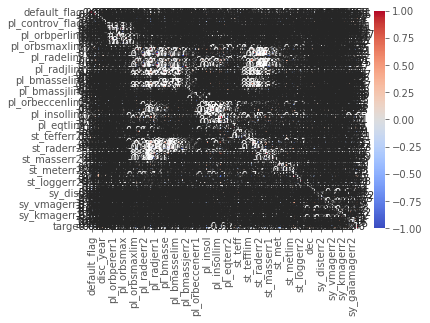

In [427]:
sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')

In [428]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1402
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          1637 non-null   object 
 1   hostname         1637 non-null   object 
 2   default_flag     1637 non-null   int64  
 3   sy_snum          1637 non-null   int64  
 4   sy_pnum          1637 non-null   int64  
 5   discoverymethod  1637 non-null   object 
 6   disc_year        1637 non-null   int64  
 7   disc_facility    1637 non-null   object 
 8   soltype          1637 non-null   object 
 9   pl_controv_flag  1637 non-null   int64  
 10  pl_refname       1637 non-null   object 
 11  pl_orbper        1539 non-null   float64
 12  pl_orbpererr1    1476 non-null   float64
 13  pl_orbpererr2    1476 non-null   float64
 14  pl_orbperlim     1539 non-null   float64
 15  pl_orbsmax       979 non-null    float64
 16  pl_orbsmaxerr1   814 non-null    float64
 17  pl_orbsmaxerr2

In [429]:
CategoricalFeatures=[i for i in finaldf.columns if finaldf[i].dtypes=='O']
finaldf[CategoricalFeatures].sample(5)

,pl_name,hostname,discoverymethod,disc_facility,soltype,pl_refname,pl_bmassprov,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
854,HAT-P-12 b,HAT-P-12,Transit,HATNet,Published Confirmed,<a refstr=SING_ET_AL__2016 href=https://ui.ads...,Mass,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,[M/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13h57m33.27s,+43d29m35.92s,2016-01-12 00:00:00,2016-01,2016-01-14 00:00:00
506,GJ 1214 b,GJ 1214,Transit,MEarth Project,Published Confirmed,<a refstr=CLOUTIER_ET_AL__2021 href=https://ui...,Mass,<a refstr=CLOUTIER_ET_AL__2021 href=https://ui...,M4 V,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h15m19.54s,+04d57m38.45s,2021-08-16 00:00:00,2021-11,2021-08-16 00:00:00
1249,HAT-P-66 b,HAT-P-66,Transit,HATNet,TESS Project Candidate,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10h02m17.43s,+53d57m02.97s,2022-08-08 00:00:00,2017-07,2022-08-08 00:00:00
1237,HAT-P-61 b,HAT-P-61,Transit,HATNet,TESS Project Candidate,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,05h01m55.24s,+50d07m52.24s,2023-03-16 00:00:00,2017-07,2023-03-16 00:00:00
160,K2-332 b,K2-332,Transit,K2,Published Candidate,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,NaN,<a refstr=KRUSE_ET_AL__2019 href=https://ui.ad...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,09h03m31.98s,+14d15m01.80s,2019-09-05 00:00:00,2019-09,2019-09-05 00:00:00


In [430]:
CategoricalFeatures

['pl_name',
 'hostname',
 'discoverymethod',
 'disc_facility',
 'soltype',
 'pl_refname',
 'pl_bmassprov',
 'st_refname',
 'st_spectype',
 'st_metratio',
 'sy_refname',
 'rastr',
 'decstr',
 'rowupdate',
 'pl_pubdate',
 'releasedate']

In [431]:
finaldf.st_metratio.isnull().sum()/len(finaldf)

0.4471594379963348

In [432]:
finaldf['PlanetNumber'] = finaldf['pl_name'].str.extract(r'([a-zA-Z])$', expand=False)

In [433]:
finaldf.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target,PlanetNumber
971,HAT-P-23 b,HAT-P-23,0,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=SADA__AMP__RAM_OACUTE_N_FOX_2016 hre...,1.212887,2.000000e-07,-2.000000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096,0.024,-0.024,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=SADA__AMP__RAM_OACUTE_N_FOX_2016 hre...,NaN,5905.0,80.0,-80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,0.04,-0.04,0.0,[Fe/H],4.33,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h24m29.74s,306.123908,+16d45m43.73s,16.762146,364.8130,4.772000,-4.653000,11.937,0.039,-0.039,10.791,0.020,-0.020,12.17410,0.000592,-0.000592,2018-04-25 00:00:00,2016-02,2016-01-28 00:00:00,0,b
879,HAT-P-14 b,HAT-P-14,0,2,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,4.627662,1.000000e-06,-1.000000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TORRES_ET_AL__2010 href=https://ui.a...,F,6600.0,90.0,-90.0,0.0,1.47,0.05,-0.05,0.0,1.39,0.04,-0.04,0.0,0.11,0.08,-0.08,0.0,[Fe/H],4.25,0.03,-0.03,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h20m27.88s,260.116172,+38d14m31.81s,38.242168,222.6630,1.257000,-1.244000,9.988,0.004,-0.004,8.851,0.019,-0.019,9.87283,0.000338,-0.000338,2022-01-24 00:00:00,2022-02,2022-01-24 00:00:00,0,b
681,GJ 581 e,GJ 581,1,1,3,Radial Velocity,2009,La Silla Observatory,Published Confirmed,0,<a refstr=ROBERTSON_ET_AL__2014 href=https://u...,3.149000,2.000000e-04,-2.000000e-04,0.0,0.02815,0.00006,-0.00006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70000,0.20000,-0.20000,0.0,0.0053,0.0006,-0.0006,0.0,Msini,0.000,0.060,-0.060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,3396.0,157.0,-157.0,0.0,0.33,0.01,-0.01,0.0,0.31,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,4.89,0.00,0.00,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h19m25.55s,229.856472,-07d43m21.70s,-7.722694,6.2981,0.002095,-0.002095,10.570,0.100,-0.100,5.837,0.023,-0.023,9.41100,0.001197,-0.001197,2014-07-09 00:00:00,2014-07,2014-07-09 00:00:00,0,e
981,HAT-P-24 b,HAT-P-24,0,2,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=KNUTSON_ET_AL__2014 href=https://ui....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.24845,11.12405,-11.12405,0.0,0.7150,0.0350,-0.0350,0.0,Mass,0.033,0.027,-0.021,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KNUTSON_ET_AL__2014 href=https://ui....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19,0.04,-0.04,0.0,-0.21,0.08,-0.08,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,07h15m18.03s,108.825117,+14d15m45.38s,14.262606,415.3440,6.636000,-6.435000,11.762,0.022,-0.022,10.543,0.020,-0.020,11.63960,0.000476,-0.000476,2018-04-25 00:00:00,2014-04,2015-10-15 00:00:00,0,b
300,CoRoT-3 b,CoRoT-3,0,1,1,Transit,2008,CoRoT,Published Confirmed,0,<a refstr=SOUTHWORTH

In [434]:
finaldf.drop(CategoricalFeatures,inplace=True,axis=1)

In [435]:
finaldf.sample(5)

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,target,PlanetNumber
392,0,1,2,2019,0,5.297110,0.000740,-0.000700,0.0,NaN,NaN,NaN,NaN,1.620,0.170,-0.190,0.0,0.145,0.015,-0.017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.513620,-13.610148,451.7690,13.9760,-13.1760,16.59000,1.133,-1.133,13.071,0.033,-0.033,15.97520,0.000969,-0.000969,0,b
96,0,1,1,2016,0,168.811174,0.001271,-0.001271,0.0,0.5400,NaN,NaN,0.0,1.830,4.730,-0.170,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,1.02,13.7,-0.25,0.0,256.0,NaN,NaN,0.0,0,4893.0,141.0,-110.0,0.0,0.76,1.97,-0.07,0.0,0.73,0.28,-0.06,0.0,-0.04,0.28,-0.24,0.0,4.54,0.06,-0.98,0.0,297.285217,49.212453,335.0900,1.6660,-1.6500,14.28700,0.114,-0.114,11.903,0.018,-0.018,14.03900,0.000333,-0.000333,1,b
95,0,2,5,2002,0,4825.000000,39.000000,-39.000000,0.0,5.5030,0.03000,-0.03000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1232.49300,21.61200,-21.61200,0.0,3.878,0.068,-0.068,0.0,0.019,0.013,-0.013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.146837,28.329815,12.5855,0.0124,-0.0123,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,0,d
1170,1,1,1,2015,0,3.122011,0.000006,-0.000006,0.0,0.0453,0.00058,-0.00140,0.0,14.437,0.717,-0.717,0.0,1.288,0.064,-0.064,0.0,429.07050,23.20159,-23.20159,0.0,1.350,0.073,-0.073,0.0,0.115,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1862.0,34.0,-34.0,0.0,0,6280.0,49.0,-49.0,0.0,1.70,0.07,-0.07,0.0,1.27,0.05,-0.12,0.0,-0.18,0.08,-0.08,0.0,4.07,0.03,-0.03,0.0,118.063438,12.139347,515.4580,16.6960,-15.6970,11.70300,0.057,-0.057,10.500,0.018,-0.018,11.67220,0.000683,-0.000683,0,b
310,0,1,1,2008,0,9.202050,0.000370,-0.000370,0.0,0.0912,0.00126,-0.00131,0.0,13.002,1.300,-0.471,0.0,1.160,0.116,-0.042,0.0,232.33373,22.88376,-23.51942,0.0,0.731,0.072,-0.074,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.0,42.0,-17.0,0.0,0,6190.0,60.0,-60.0,0.0,1.15,0.09,-0.03,0.0,1.19,0.05,-0.05,0.0,0.05,0.07,-0.07,0.0,4.40,0.02,-0.07,0.0,102.194623,-0.672786,726.4120,15.1810,-14.5820,13.65200,0.092,-0.092,12.288,0.030,-0.030,13.56130,0.000354,-0.000354,0,b


In [436]:
finaldf.shape

(1637, 78)

In [437]:
finaldf['PlanetNumber'].value_counts()

b    1277
c     183
d      73
e      58
f      37
g       7
Name: PlanetNumber, dtype: int64

In [438]:
finaldf['PlanetNumber'].isnull().sum()

2

In [439]:
finaldf.dropna(subset=['PlanetNumber'], inplace=True)

In [440]:
OE=OrdinalEncoder(categories=[['b','c','d','e','f','g']])
finaldf['PlanetNumber']=OE.fit_transform(finaldf[['PlanetNumber']])
finaldf.sample(5)

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,target,PlanetNumber
18,0,2,5,2014,0,34.141890,0.000264,-0.000264,0.0,NaN,NaN,NaN,NaN,1.090,0.120,-0.150,0.0,0.097,0.011,-0.013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3558.0,40.28,-37.83,0.0,0.37,0.04,-0.04,0.0,0.38,0.05,-0.05,0.0,-0.23,0.09,-0.093,0.0,4.89,0.04,-0.04,0.0,286.540028,49.437261,NaN,NaN,NaN,16.36300,1.133,-1.133,12.600,0.028,-0.028,15.90150,0.003522,-0.003522,1,3.0
651,0,1,1,2004,0,2.644000,0.001000,-0.001000,0.0,0.028,0.001,-0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3600,0.200,-0.210,0.0,0.06721,0.00063,-0.00066,0.0,0.152,0.009,-0.008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3456.0,157.00,-157.00,0.0,0.43,0.01,-0.01,0.0,0.42,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,4.80,0.00,0.00,0.0,175.550536,26.703067,9.75321,0.00898,-0.00896,10.67000,0.100,-0.100,6.073,0.016,-0.016,9.57148,0.000934,-0.000934,0,0.0
26,0,2,1,2008,0,NaN,NaN,NaN,NaN,2.540,0.040,-0.040,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3127.3000,95.300,-95.300,0.0,9.84000,0.30000,-0.30000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.607838,10.839138,76.22200,0.62170,-0.62170,5.51048,0.023,-0.023,3.366,0.204,-0.204,5.27476,0.002654,-0.002654,0,0.0
1166,1,1,1,2007,0,2.788490,0.000025,-0.000025,0.0,NaN,NaN,NaN,NaN,13.563,1.121,-1.121,0.0,1.210,0.100,-0.100,0.0,311.4734,63.566,-63.566,0.0,0.98000,0.20000,-0.20000,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5960.0,100.00,-100.00,0.0,1.12,0.09,-0.09,0.0,1.04,0.29,-0.29,0.0,0.24,NaN,NaN,0.0,4.37,0.03,-0.03,0.0,274.405533,36.621462,303.33600,1.81200,-1.79100,11.95400,0.029,-0.029,10.481,0.018,-0.018,11.82240,0.000188,-0.000188,0,0.0
1201,0,1,1,2015,0,3.585228,0.000003,-0.000003,0.0,NaN,NaN,NaN,NaN,14.543,0.728,-0.728,0.0,1.297,0.065,-0.065,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547.17,NaN,NaN,0.0,1234.0,NaN,NaN,0.0,0,5852.0,126.79,-126.79,0.0,1.07,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.41,0.08,-0.08,0.0,264.273510,25.731147,511.38800,3.63400,-3.58500,13.19700,0.126,-0.126,11.627,0.025,-0.025,13.09550,0.000318,-0.000318,0,0.0


In [441]:
finaldf['target'].corr(finaldf['st_rad'])

-0.10379922708982961

In [442]:
LCorrFeatures=([col for col in finaldf.columns if abs(finaldf['target'].corr(finaldf[col])) <= 0.17]) 
LCorrFeatures
#41 deleted

['default_flag',
 'sy_snum',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_eqterr1',
 'pl_eqterr2',
 'st_tefferr1',
 'st_tefferr2',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_masserr1',
 'st_masserr2',
 'st_loggerr1',
 'st_loggerr2',
 'sy_dist',
 'sy_disterr1',
 'sy_disterr2',
 'sy_kmagerr1',
 'sy_kmagerr2',
 'sy_gaiamagerr1',
 'sy_gaiamagerr2']

In [443]:
finaldf.drop(columns=LCorrFeatures, inplace=True)

In [444]:

Missing=finaldf.isnull().mean().sort_values(ascending=False).index[:19]

In [445]:
Missing

Index(['pl_insolerr1', 'pl_insolerr2', 'pl_insol', 'pl_insollim', 'pl_eqt',
       'pl_orbeccenerr1', 'pl_eqtlim', 'pl_radjlim', 'pl_radj', 'pl_rade',
       'pl_radelim', 'st_meterr2', 'st_meterr1', 'pl_orbeccen', 'st_met',
       'st_metlim', 'pl_orbsmaxlim', 'st_logglim', 'st_logg'],
      dtype='object')

In [446]:
finaldf.drop(Missing,axis=1,inplace=True)

In [447]:
finaldf.shape

(1635, 18)

<AxesSubplot:>

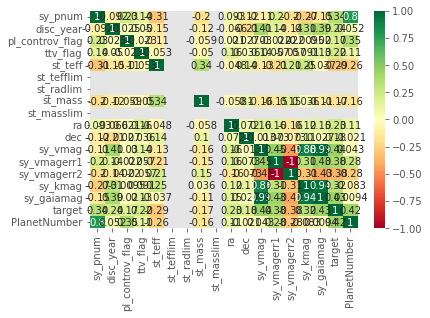

In [448]:
sns.heatmap(finaldf.corr(), annot=True,cmap='RdYlGn')

In [449]:
finaldf['target'].corr(finaldf['st_tefflim'])

nan

In [450]:
'''st_masslim:Stellar Mass Limit Flag
st_tefflim:Stellar Effective Temperature Limit Flag
st_radlim:Stellar Radius Limit Flag
All these features are made limited thus resulting in 0 and nans
'''

'st_masslim:Stellar Mass Limit Flag\nst_tefflim:Stellar Effective Temperature Limit Flag\nst_radlim:Stellar Radius Limit Flag\nAll these features are made limited thus resulting in 0 and nans\n'

In [451]:
finaldf.drop(['st_tefflim','st_radlim','st_masslim'],axis=1,inplace=True)
finaldf.shape

(1635, 15)

<h2>Synthetic Generation</h2>

In [453]:
finaldf.sample(5)

,sy_pnum,disc_year,pl_controv_flag,ttv_flag,st_teff,st_mass,ra,dec,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_gaiamag,target,PlanetNumber
926,1,2007,0,0,6290.0,1.30,245.151432,41.047960,8.720,0.030,-0.030,7.603,8.59842,0,0.0
1210,1,2015,0,0,6568.0,NaN,100.848014,27.252182,10.920,0.030,-0.030,9.830,10.82450,0,0.0
991,1,2010,0,0,5079.0,1.12,213.156551,4.059418,11.757,0.025,-0.025,9.581,11.46410,0,0.0
634,3,2014,0,0,3472.0,0.48,173.861919,-32.543630,9.810,0.100,-0.100,5.623,8.89138,0,1.0
498,2,2017,0,0,3287.0,0.34,175.432608,42.751586,11.939,0.048,-0.048,6.822,10.57690,0,1.0


 sy_pnum:        Number of Planets
 disc_year:      Discovery Year
 pl_controv_flag: Controversial Flag
 ttv_flag:       Data show Transit Timing Variations
 st_teff:        Stellar Effective Temperature [K]
 st_mass:        Stellar Mass [Solar mass]
 ra:             RA [deg]
 dec:            Dec [deg]
 sy_vmag:        V (Johnson) Magnitude ----lower values brightness high
 sy_vmagerr1:    V (Johnson) Magnitude Upper Unc
 sy_vmagerr2:    V (Johnson) Magnitude Lower Unc
 sy_kmag:        Ks (2MASS) Magnitude ---- Lower values of Ks magnitude indicate brighter stars in this wavelength range.
 sy_gaiamag:     Gaia Magnitude ----how bright a star appears in the optical part of the electromagnetic spectrum


In [459]:
finaldf['target'].corr(finaldf['disc_year'])

0.170531515063201

<AxesSubplot:title={'center':'Controversial Flag'}>

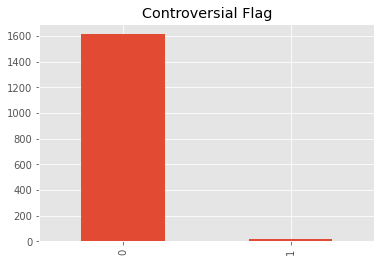

In [463]:
finaldf.pl_controv_flag.value_counts().plot(kind='bar', title='Controversial Flag')

In [461]:
finaldf['target'].corr(finaldf['pl_controv_flag'])

0.170531515063201

<AxesSubplot:title={'center':'Count (ttv_flag)'}>

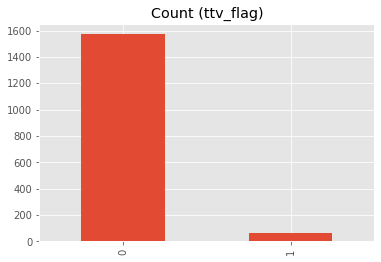

In [464]:
finaldf.ttv_flag.value_counts().plot(kind='bar', title='Count (ttv_flag)')

In [465]:
finaldf['target'].corr(finaldf['ttv_flag'])

0.22370242325852327

In [471]:
finaldf.drop(['ttv_flag','pl_controv_flag','disc_year','sy_vmagerr1','sy_vmagerr2'],axis=1,inplace=True)

KeyError: "['ttv_flag', 'pl_controv_flag', 'disc_year', 'sy_vmagerr1', 'sy_vmagerr2'] not found in axis"

In [479]:
TrainX,TestX,TrainY,TestY = train_test_split(finaldf.drop('target',axis=1),finaldf['target'],test_size=0.1,random_state=42)
TrainX.shape

(1471, 9)

In [483]:
TrainX.describe()

,sy_pnum,st_teff,st_mass,ra,dec,sy_vmag,sy_kmag,sy_gaiamag,PlanetNumber
count,1471.000000,1171.000000,1132.000000,1471.000000,1471.000000,1455.000000,1463.000000,1459.000000,1471.000000
mean,1.791298,4982.439889,0.876855,201.431363,12.489492,11.706286,9.037848,11.300248,0.414684
std,1.285960,1349.152906,0.855771,100.279852,32.115498,2.830339,2.862858,2.814650,0.941501
min,1.000000,580.500000,0.010000,1.676464,-79.851422,3.950000,1.564000,3.678530,0.000000
25%,1.000000,3814.500000,0.500000,119.773502,-7.722694,10.160000,6.928000,9.571480,0.000000
50%,1.000000,5190.000000,0.890000,207.907675,15.391209,11.937000,9.641000,11.523900,0.000000
75%,2.000000,5883.500000,1.100000,289.955527,41.047960,13.676000,11.487000,13.218800,0.000000
max,7.000000,29564.000000,23.560000,358.558844,83.697531,20.154400,14.593000,19.879000,5.000000


array([[<AxesSubplot:title={'center':'sy_pnum'}>,
        <AxesSubplot:title={'center':'st_teff'}>,
        <AxesSubplot:title={'center':'st_mass'}>],
       [<AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':'dec'}>,
        <AxesSubplot:title={'center':'sy_vmag'}>],
       [<AxesSubplot:title={'center':'sy_kmag'}>,
        <AxesSubplot:title={'center':'sy_gaiamag'}>,
        <AxesSubplot:title={'center':'target'}>],
       [<AxesSubplot:title={'center':'PlanetNumber'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

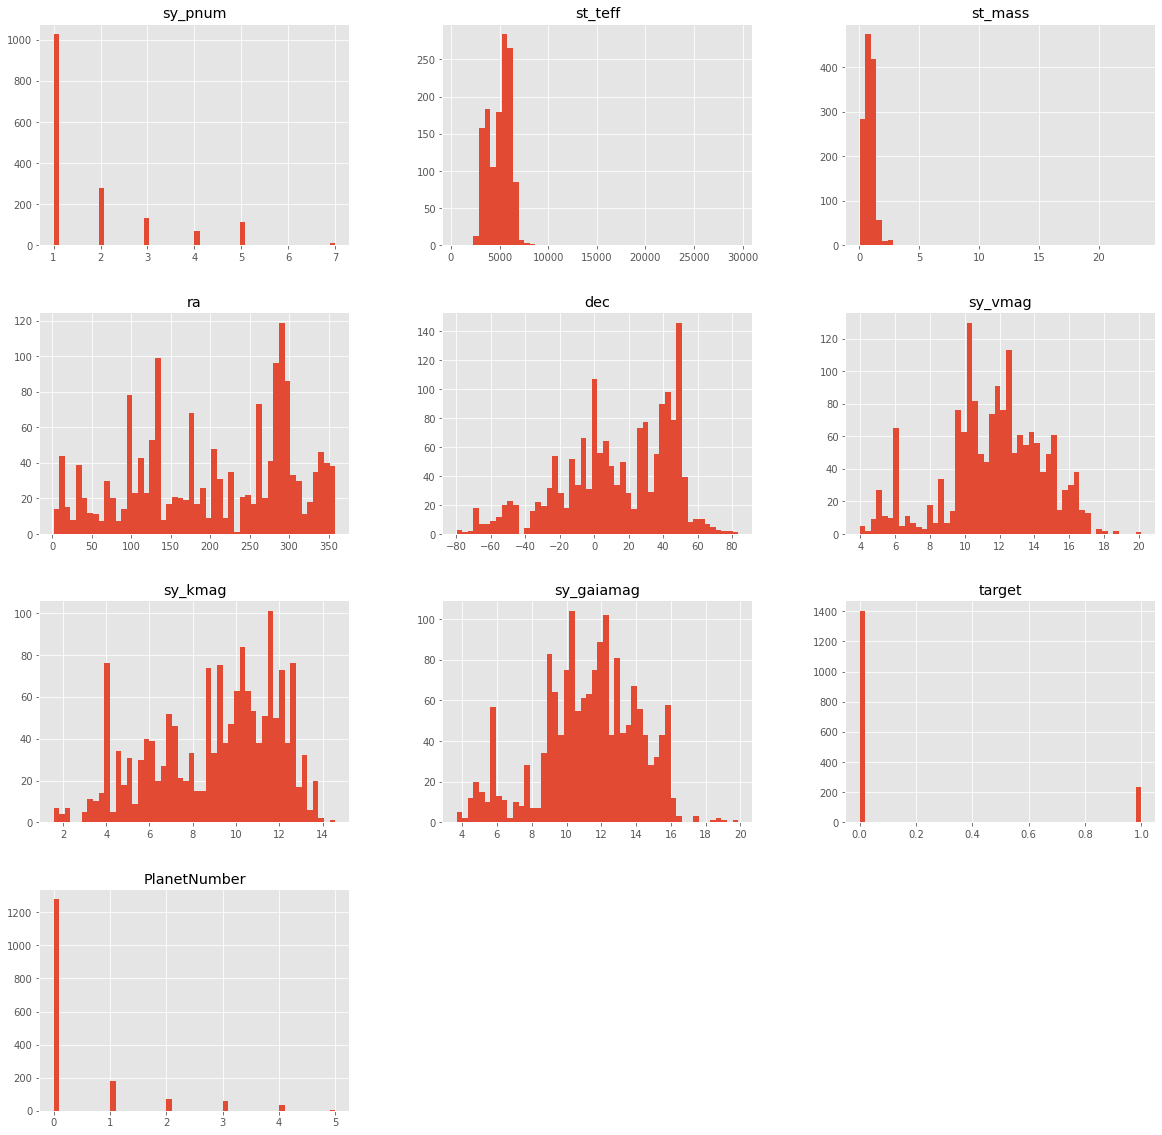

In [481]:
finaldf.hist(figsize=(20,20),bins=50)

In [482]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1402
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       1635 non-null   int64  
 1   st_teff       1290 non-null   float64
 2   st_mass       1260 non-null   float64
 3   ra            1635 non-null   float64
 4   dec           1635 non-null   float64
 5   sy_vmag       1616 non-null   float64
 6   sy_kmag       1624 non-null   float64
 7   sy_gaiamag    1621 non-null   float64
 8   target        1635 non-null   int64  
 9   PlanetNumber  1635 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 205.0 KB


In [490]:
imputer=SimpleImputer(strategy='median')
TrainX=np.array(imputer.fit_transform(TrainX),'float32')
# imputer.transform(TestX)

In [492]:
TrainX=pd.DataFrame(TrainX,columns=TestX.columns)
TrainX.sample(5)

,sy_pnum,st_teff,st_mass,ra,dec,sy_vmag,sy_kmag,sy_gaiamag,PlanetNumber
1339,2.0,4780.0,0.81,297.710175,48.081863,9.460,7.009,9.15098,0.0
138,2.0,3352.0,0.89,239.577560,35.408115,12.675,7.869,11.51090,0.0
294,1.0,5943.0,0.89,5.618525,-59.942589,12.283,10.793,12.08150,0.0
489,1.0,5302.0,0.89,155.681458,50.128712,9.763,7.837,9.51936,0.0
1096,5.0,3650.0,0.89,259.751068,-34.997765,10.602,6.036,9.38033,0.0


In [495]:
TestX=pd.DataFrame(imputer.transform(TestX),columns=TrainX.columns)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [497]:
TestX.sample(5) 

,sy_pnum,st_teff,st_mass,ra,dec,sy_vmag,sy_kmag,sy_gaiamag,PlanetNumber
81,2.0,4114.0,0.89,337.513620,-13.610148,16.59000,13.071,15.9752,1.0
37,1.0,5190.0,0.02,181.889091,-39.548440,11.93700,11.945,17.4076,0.0
93,2.0,5255.0,0.90,242.602101,43.816362,6.61935,4.714,6.3830,0.0
63,5.0,3517.0,0.38,286.540028,49.437261,16.36300,12.600,15.9015,3.0
124,1.0,5330.0,0.89,35.383494,32.246044,12.52500,10.501,12.3021,0.0


In [498]:
TrainX.columns

Index(['sy_pnum', 'st_teff', 'st_mass', 'ra', 'dec', 'sy_vmag', 'sy_kmag',
       'sy_gaiamag', 'PlanetNumber'],
      dtype='object')

In [ ]:
# smote=SMOTE()

<h2>Model Training</h2>

In [504]:
TrainY.value_counts()

0    1259
1     212
Name: target, dtype: int64

In [507]:
rfc=RandomForestClassifier(n_estimators=99,random_state=42)
cv_scores=cross_val_score(rfc,TrainX,TrainY,cv=10,scoring='accuracy')
cv_scores.mean()

0.9762042654899797

In [516]:
Rfc=RandomForestClassifier(n_estimators=99,random_state=42)
Rfc.fit(TrainX,TrainY)

RandomForestClassifier(n_estimators=99, random_state=44)

In [517]:
Rfc.score(TestX, TestY)

0.9878048780487805